# 1) Create the following data and write to a csv file: Generate 10 random points in each of the the following circles (i) centre at (3,3) and radius 2, (ii) centre at (7,7) and radius 2 (iii) centre at (11,11) and radius 2.  Plot the data as well.     

In [192]:
# Python program for the above approach
import math as m
import numpy as np
import random as ran

def circle_point(x, y, r, num):
    point_matrix = np.zeros((num, 2))
    
    r = r - 0.5
    for i in range(num):
        point_matrix[i][0] = x + ((r*ran.random())*(np.cos(2 * np.pi * ran.random())))
        point_matrix[i][1] = y + ((r*ran.random())*(np.sin(2 * np.pi * ran.random())))
                                  
    return point_matrix
                                  


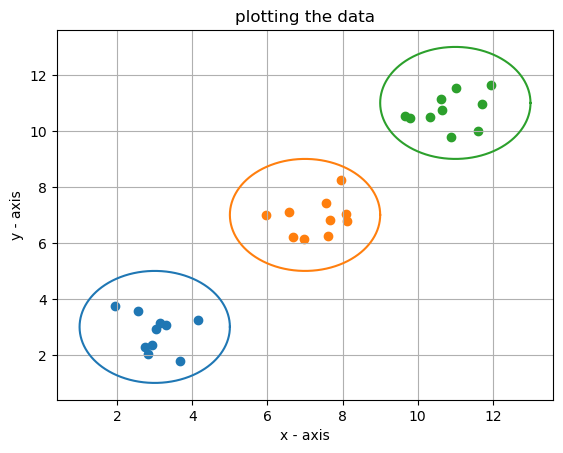

In [193]:
import matplotlib.pyplot as plt

X = [3, 7, 11]
Y = [3, 7, 11]
r = 2

point_list = []
for i in range(3):
    theta = np.linspace(0, 2*np.pi, 1000)
    x_val = X[i] + r*np.cos(theta)
    y_val = Y[i] + r*np.sin(theta)
    plt.plot(x_val, y_val)
    
    mat = circle_point(X[i], Y[i], 2, 10)
    point_list.append(mat)
    plt.scatter(mat[:, 0], mat[:, 1])
    
#for i in range()


# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
# giving a title to my graph
plt.title('plotting the data')
 
# show a legend on the plot
#plt.legend()

plt.grid(True)
 
# function to show the plot
plt.show()



In [194]:
import csv

# name of csv file
filename = "circle_data.csv"
 
# writing to csv file
with open(filename, 'w', newline='') as csvfile:
    # creating a csv writer object
    csvwriter = csv.writer(csvfile)
 
    # writing the fields
    csvwriter.writerow(['X', 'Y'])
 
    # writing the data rows
    csvwriter.writerows(point_list[0])
    csvwriter.writerows(point_list[1])
    csvwriter.writerows(point_list[2])
    
    

# 2)  Implement K - means clustering algorithm and for the above data, show the change in the centroid as well as the class assignments. Also, plot the cost function for K varying from 1 to 5. Show that the value of K matches with the intuition from the data. Plot the K-classes for the final K-value.

In [195]:

def initialize_centroids(X, k):
    centroids = np.zeros((k, X.shape[1]))
    
    for i in range(k):
        centroids[i][0] = 4 + 6*ran.random()
        centroids[i][1] = 4 + 6*ran.random()    # Randomly initialise k centroids.
        
    return centroids


def assign_clusters(X, centroids):
    # Calculate distances between data points and centroids, then find the closest centroid for each data point
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)


def update_centroids(X, labels, k):
    # Calculate new centroids as the mean of data points in each cluster
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        if np.sum(labels == i) > 0:  # Check if any data points are assigned to the centroid
            centroids[i] = np.mean(X[labels == i], axis=0)
    return centroids


def kmeans(X, k, max_iter=10):

    # Initialize centroids
    centroids = initialize_centroids(X, k)
    initial_centroids = centroids
    centroid_history = [centroids.copy()]
   
    # Iterate until convergence or maximum iterations reached
    for _ in range(max_iter):
        # Assign clusters
        labels = assign_clusters(X, centroids)
        # Update centroids
        new_centroids = update_centroids(X, labels, k)
        # Check for convergence
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
        centroid_history.append(centroids.copy())
   
    centroid_history = np.array(centroid_history)
   
    return initial_centroids, centroids, labels, centroid_history



def plot_clusters(X, initial_centroids, centroids, labels, centroid_history=None):
    """Plot clusters and centroids."""
    # Plot data points colored by cluster and centroids
    plt.figure(figsize=(8, 8))
    for i in range(centroids.shape[0]):
        plt.scatter(X[labels == i][:, 0], X[labels == i][:, 1], label=f'Cluster {i+1}')
     
    #plottimg the initial and last position of each centroids.
    plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], marker='*', s=200, color='black')    
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, color='black', label='Centroids')
    
    # plot centroid movement history
    if centroid_history is not None:
        for i in range(centroids.shape[0]):
            history = centroid_history[:, i, :]
            plt.plot(history[:, 0], history[:, 1], marker='o', markersize=4, linestyle='-', label=f'Centroid {i+1} History')
    plt.title(f'K-Means Clustering with K={centroids.shape[0]}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()
    
    

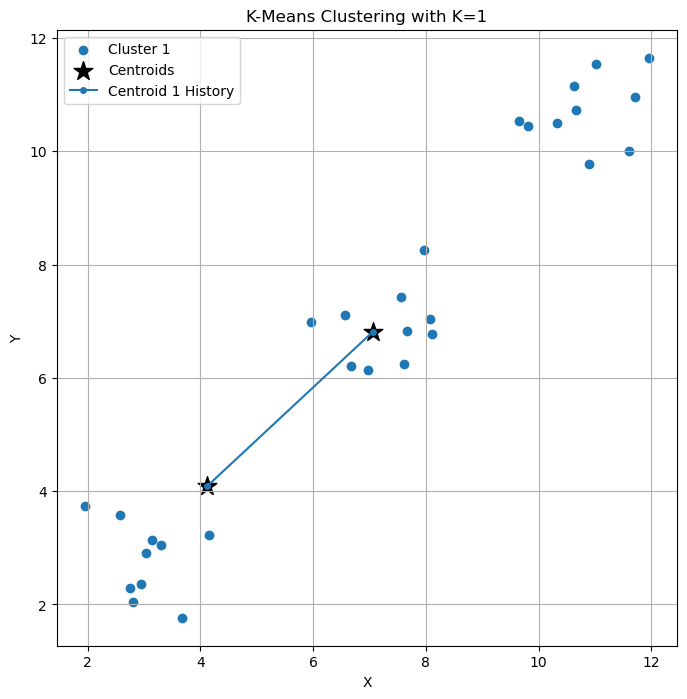

In [203]:
import pandas as pd

data = pd.read_csv('circle_data.csv')

data_values = data.values

# Visualize the clustering process for different values of K

# Visualize the clustering process for K=1
initial_centroids1, centroids1, labels1, centroid_history1 = kmeans(data_values, k=1)
plot_clusters(data_values, initial_centroids1, centroids1, labels1, centroid_history1)



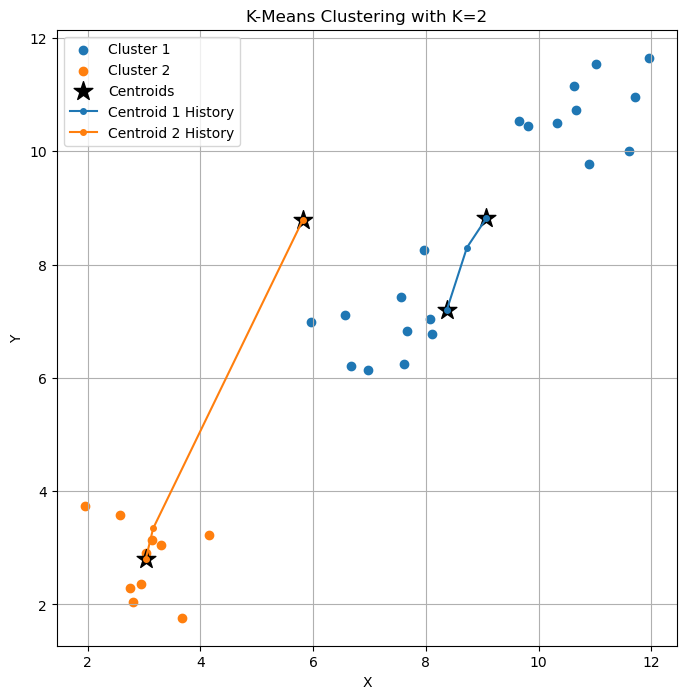

In [204]:
# Visualize the clustering process for K=2
initial_centroids2, centroids2, labels2, centroid_history2 = kmeans(data_values, k=2)
plot_clusters(data_values, initial_centroids2, centroids2, labels2, centroid_history2)



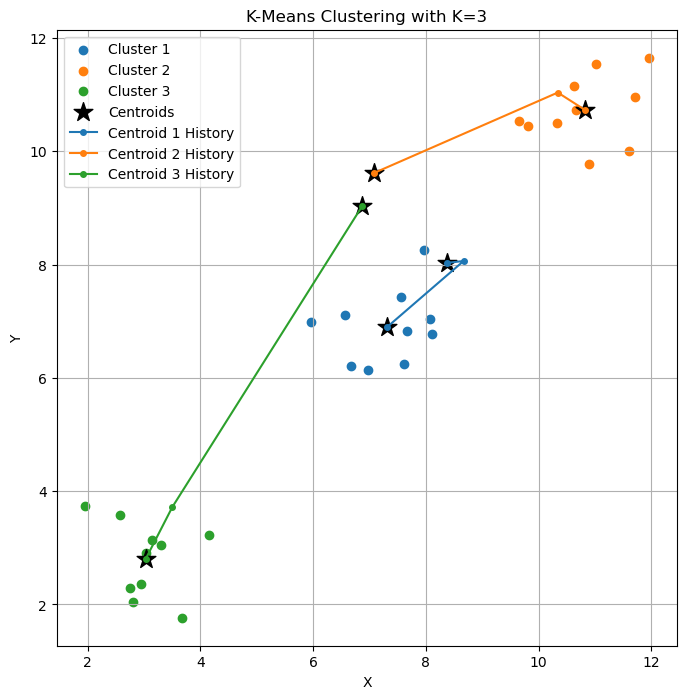

In [205]:
# Visualize the clustering process for K=3
initial_centroids3, centroids3, labels3, centroid_history3 = kmeans(data_values, k=3)
plot_clusters(data_values, initial_centroids3, centroids3, labels3, centroid_history3)



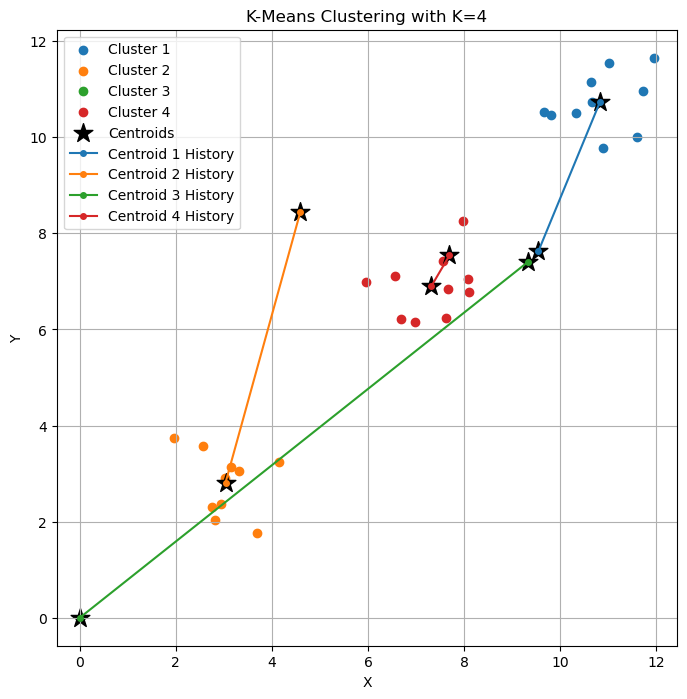

In [206]:
# Visualize the clustering process for K=4
initial_centroids4, centroids4, labels4, centroid_history4 = kmeans(data_values, k=4)
plot_clusters(data_values, initial_centroids4, centroids4, labels4, centroid_history4)



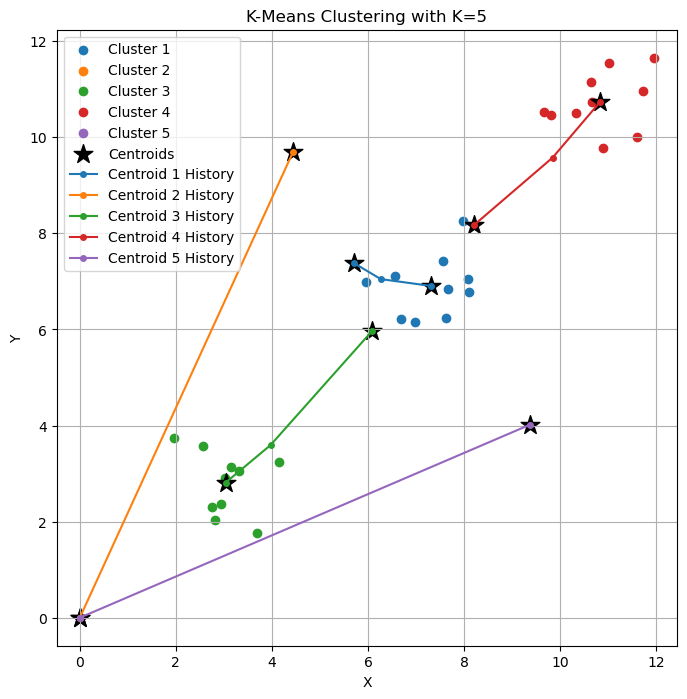

In [207]:
# Visualize the clustering process for K=5
initial_centroids5, centroids5, labels5, centroid_history5 = kmeans(data_values, k=5)
plot_clusters(data_values, initial_centroids5, centroids5, labels5, centroid_history5)



# Plot the cost function for different values of K from 1 to 5

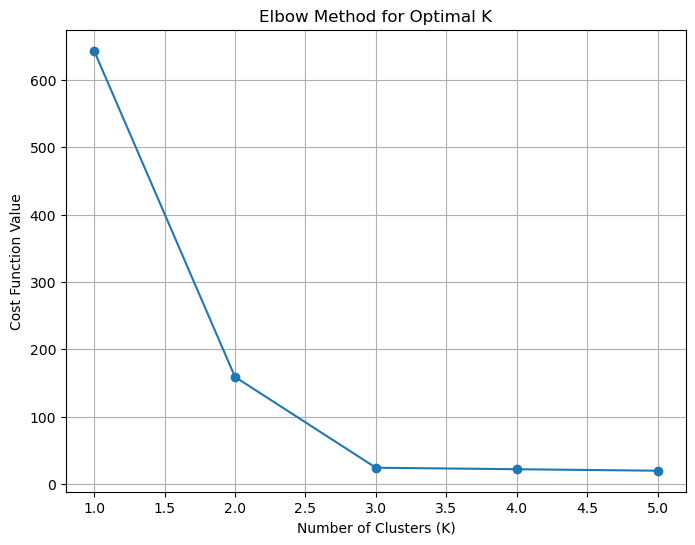

In [208]:


# Calculate the cost function for each value of K
costs = []
for k in range(1, 6):
    initial_centroids, centroids, labels, centroid_history = kmeans(data_values, k=k)
    cost = np.sum((data_values - centroids[labels]) ** 2)
    costs.append(cost)
    
# Plot the cost function values against the number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), costs, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Cost Function Value')
plt.grid(True)
plt.show()



# Show that the value of K matches with the intuition from the data.

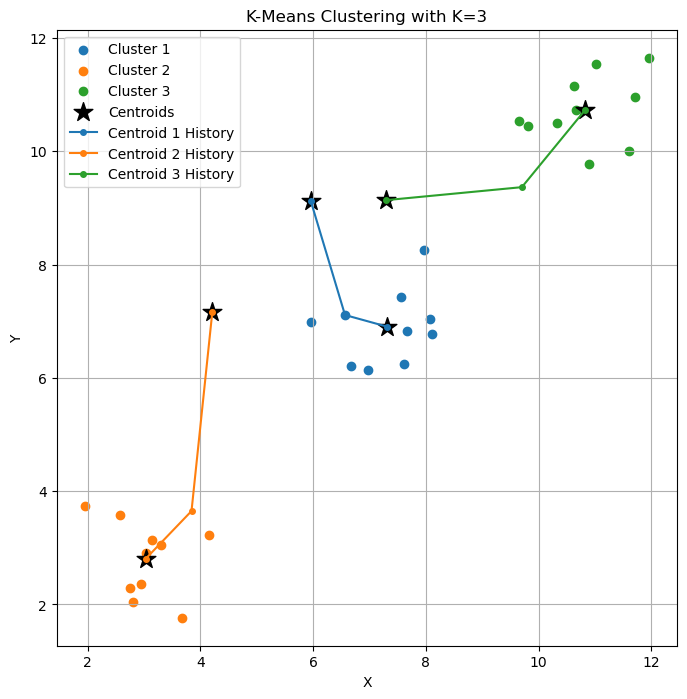

In [210]:
# Visualize the clustering process for K=3
initial_centroids3, centroids3, labels3, centroid_history3 = kmeans(data_values, k=3)
plot_clusters(data_values, initial_centroids3, centroids3, labels3, centroid_history3)



# Therefore, if the value of the k is 3 then matches with the intuition from the data.